In [1]:
import sys
import os

# Add the scripts/ folder to the Python path
sys.path.append(os.path.abspath("scripts"))

In [12]:
import joblib
from scripts.split_data import load_split_data
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from scripts.save_utils import save_fig

In [3]:
DATA_PATH = "data/raw/Bank Customer Churn Prediction.csv"
_, X_test, _, y_test = load_split_data(DATA_PATH)

In [5]:
model_path = "models/rf_pipeline_20250406_21&M34.joblib"
rf_model = joblib.load(model_path)

In [6]:
#Predicting class labels
y_pred = rf_model.predict(X_test)

#Predicting churn probabilities
y_proba = rf_model.predict_proba(X_test)[:, 1]

#### Classification Report

In [7]:
report = classification_report(y_test, y_pred, target_names=["Not Churned", "Churned"])
print("classification_report: \n")
print(report)

classification_report: 

              precision    recall  f1-score   support

 Not Churned       0.87      0.97      0.92      1593
     Churned       0.78      0.43      0.56       407

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000



#### Confusion Matrix

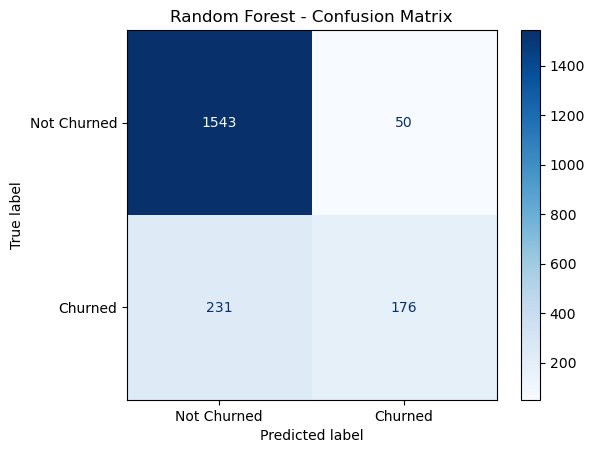

In [9]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Churned", "Churned"])
disp.plot(cmap='Blues', values_format='d')
plt.title("Random Forest - Confusion Matrix")
save_fig("eval-rand-forest-confusion-matrix", "evaluation")
plt.show()

#### ROC Curve and AUC

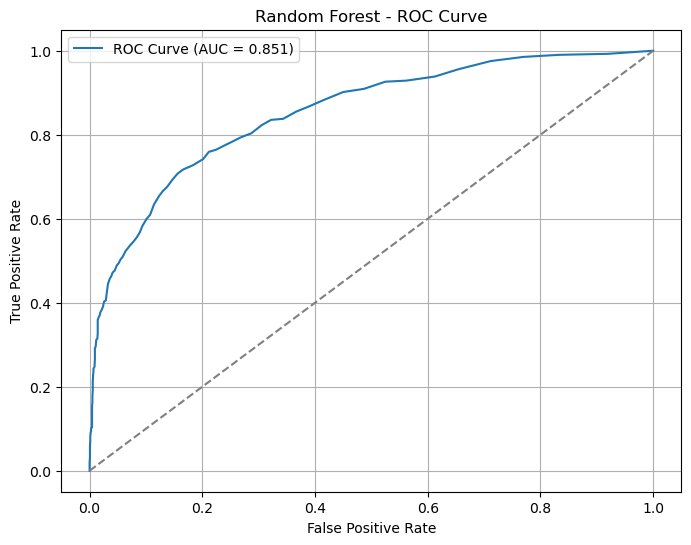

In [14]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest - ROC Curve")
plt.legend()
plt.grid(True)
save_fig("eval-Rand-Forest-ROC-AUC","evaluation")
plt.show()

#### Precision Recall Curve

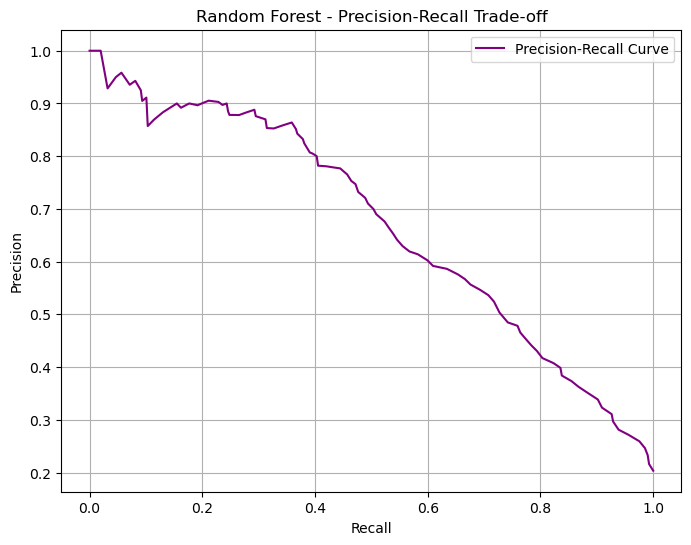

In [15]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve', color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest - Precision-Recall Trade-off')
plt.legend()
plt.grid(True)
save_fig("eval-rand-forest-precision-recall","evaluation")
plt.show()

# Evaluation Summary

##  Test Set Performance Metrics

| Metric             | Score               |
|--------------------|---------------------|
| Accuracy           | 0.86                |
| F1 Score (Churn)   | 0.56                |
| ROC-AUC Score      | 0.851               |
| Precision (Churn)  | 0.78                |
| Recall (Churn)     | 0.43                |

---

##  Confusion Matrix

|                      | Predicted: Not Churned | Predicted: Churned |
|----------------------|------------------------|---------------------|
| **Actual: Not Churned** | 1543                   | 50                  |
| **Actual: Churned**     | 231                    | 176                 |

- **True Negatives (TN)**: 1543 – correctly predicted non-churners  
- **False Positives (FP)**: 50 – predicted churn when it wasn't  
- **False Negatives (FN)**: 231 – actual churners predicted as non-churners  
- **True Positives (TP)**: 176 – correctly predicted churners

---

##  Precision-Recall Trade-off

- The model maintains **high precision** at low to mid recall values.
- There is a clear **trade-off**: increasing recall beyond ~0.5 causes precision to drop significantly.
- This suggests a threshold tweak might improve performance if recall is a priority.

---

##  Interpretation
- Random Forest captures more complex patterns but still **misses over half of churners**.
- **Precision is high**, meaning predictions of churn are reliable, but **recall is modest**, so it misses many actual churners.
